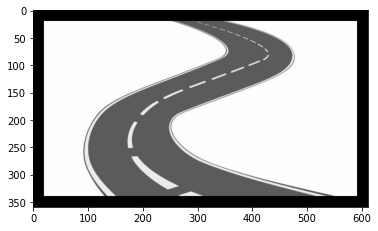

(359, 612, 3)
(359, 612, 3)
<built-in method astype of numpy.ndarray object at 0x000001B8A73D6F30>


In [110]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

img = mpimg.imread('road.jpg')
cropped_array = img[20:img.shape[0]-20, 20:img.shape[1]-20, :]
padded_array = np.pad(cropped_array, ((20, 20), (20, 20), (0, 0)))
# padded_array=padded_array[...,::-1]
# plt.imshow(cv2.cvtColor(padded_array, cv2.COLOR_BGR2RGB))
plt.imshow(padded_array)
plt.show()
print(img.shape)
print(padded_array.shape)
print(img.astype)

In [111]:
def border(img):
    x=1
    cropped_array = img[x:img.shape[0]-x, x:img.shape[1]-x, :]
    return np.pad(cropped_array, ((x, x), (x, x), (0, 0)))

In [112]:
from operator import add
from functools import reduce

def split4(image):
    half_split = np.array_split(image, 2)
    print(half_split[0].shape)
    res = map(lambda x: np.array_split(x, 2, axis=1), half_split)
    print(res)
    return reduce(add, res)

In [113]:
def calculate_mean(img):
    return np.mean(img, axis=(0, 1))

In [114]:
def concatenate4(north_west, north_east, south_west, south_east):
    top = np.concatenate((north_west, north_east), axis=1)
    bottom = np.concatenate((south_west, south_east), axis=1)
    return np.concatenate((top, bottom), axis=0)

In [115]:
def split(array, nrows, ncols):
    """Split a matrix into sub-matrices."""

    r, h = array.shape
    return (array.reshape(h//nrows, nrows, -1, ncols)
            .swapaxes(1, 2)
            .reshape(-1, nrows, ncols))

In [116]:
def checkEqual(myList):
    first=myList[0]
    return all((x==first).all() for x in myList)

class QuadTree:

    def insert(self, img,matrix,level = 0):
        self.level = level
        #self.mean = calculate_mean(img).astype(int)
        #self.resolution = (img.shape[0], img.shape[1])
        self.img=img
        self.final = True

        if not checkEqual(matrix):
            split_img = split4(img)

            self.final = False

            n_w, n_e, s_w, s_e =  split(matrix, matrix.shape[0]//2, matrix.shape[1]//2)

            self.north_west = QuadTree().insert(split_img[0],n_w, level + 1)
            self.north_east = QuadTree().insert(split_img[1],n_e, level + 1)
            self.south_west = QuadTree().insert(split_img[2],s_w, level + 1)
            self.south_east = QuadTree().insert(split_img[3],s_e, level + 1)

        return self

    def get_image(self, level):
        if(self.final or self.level == level):
            #return np.tile(self.mean, (self.resolution[0], self.resolution[1], 1))
            # plt.imshow(self.img)
            # plt.show()
            return border(self.img)

        return concatenate4(
            self.north_west.get_image(level),
            self.north_east.get_image(level),
            self.south_west.get_image(level),
            self.south_east.get_image(level))


    # def update_image(self, level):
    #     if(self.final or self.level == level):
    #         return np.tile(self.mean, (self.resolution[0], self.resolution[1], 1))
    #         # plt.imshow(self.img)
    #         # plt.show()
    #         # return border(self.img)

In [117]:
matrix = np.random.randint(2, size=(16,16))
# matrix = np.random.randint(2, size=(img.shape[0], img.shape[1]))
matrix = []

with open ("input.txt", "r") as myfile:
    data = myfile.read().splitlines()
# print(text)
for line in data:
    # print(text)
    list_of_ints = list(map(int, line))
    matrix.append(list_of_ints)
# with open('input.txt', 'r') as f:
#     lines = f.split("\n")
#     for line in lines:
#         # line = f.read().splitlines()
#         print(line)
#         print(type(line))
#         # list_of_ints = list(map(int, line))
#         list_of_ints = [int(x) for x in line]
#         # print(list_of_ints)
#         # matrix.append(list_of_ints)

matrix = np.array(matrix)
# # # print(input)
print(matrix)
print(matrix.shape)


[[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1]]
(16, 16)


In [118]:
quadtree = QuadTree().insert(img,matrix)
# plt.imshow(quadtree.get_image(5))
# plt.show()
# plt.imshow(quadtree.get_image(3))
# plt.show()
# plt.imshow(quadtree.get_image(7))
# plt.show()
# plt.imshow(quadtree.get_image(10))
# plt.show()

(180, 612, 3)
(90, 306, 3)
(45, 153, 3)
(23, 77, 3)
(23, 76, 3)
(45, 153, 3)
(23, 76, 3)
(45, 153, 3)
(23, 77, 3)
(90, 306, 3)
(45, 153, 3)
(23, 76, 3)
(90, 306, 3)
(45, 153, 3)
(23, 77, 3)
(23, 77, 3)
(45, 153, 3)
(23, 76, 3)
(45, 153, 3)
(23, 77, 3)
(22, 77, 3)
(22, 76, 3)
(45, 153, 3)
(23, 77, 3)
(22, 76, 3)


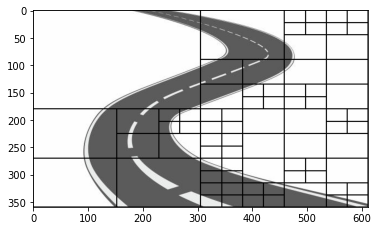

In [119]:
plt.imshow(quadtree.get_image(4))
plt.show()

In [120]:
print(quadtree)